This notebook intends to verify the implementation of the model `KM1D` by comparing the dimensionless time-radius curves at various parameters.

From the paper `A.A. Doinikov, Translational motion of a spherical bubble in an acoustic standing wave of high intensity, Phys. Fluids, 14, (2002), pp. 1420-1425`, multiple  figures are reconstructed to verify the correctness of the present implementation. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from single_solution_KM1D import SingleBubble as KMBubble
from single_solution_KM1D import P0, RHO, PE, ST

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size"  : 16,
    "font.serif" : "Palatino"})

In the paper mentioned above the equilibrium radius was not given directly; thus, it needs to be calculated before the simulations.

The bubble path is calculated for various relative frequency values $\omega_r = \omega / \omega_0$, where $\omega = 2\pi f$ is the angular frequency and $\omega_0$ is the linear resonance frequency of a bubble with equilbrium radius $R_0$. The resonance frequncy is given by

$\omega_0=\dfrac{1}{R_0} \sqrt{\dfrac{3\gamma P_0}{\rho_L} + \dfrac{2(3\gamma -1)\sigma}{\rho_L R_0}}$.

From equation

$\dfrac{\omega}{\omega_r}=\dfrac{1}{R_0} \sqrt{\dfrac{3\gamma P_0}{\rho_L} + \dfrac{2(3\gamma -1)\sigma}{\rho_L R_0}},$

one can calculate the equilbrium bubble radius $R_0$ for a given excitation frequency $\omega$.

The steps are implemented in function `get_radius` and the relative frequency is calculated by `fsolve` implemented in `scipy` computational library.

In [3]:
w0 = lambda R0: ((3 * PE * P0 / RHO) + 2 * (3*PE -1 ) * ST / RHO / R0)**0.5 / R0

def get_radius(wr, f):
    """
    wr      - Relative Frequency
    f       - Excitation Frequency  (kHz)
    Returns:
    R0      - Equilibrium Radius (micron)
    """
    return fsolve(func = lambda R0, wr, w:   (w / wr - w0(R0))**2,
                  x0 = 10e-6,
                  args=(wr, 2*np.pi * f * 1000) )[0] * 1e6



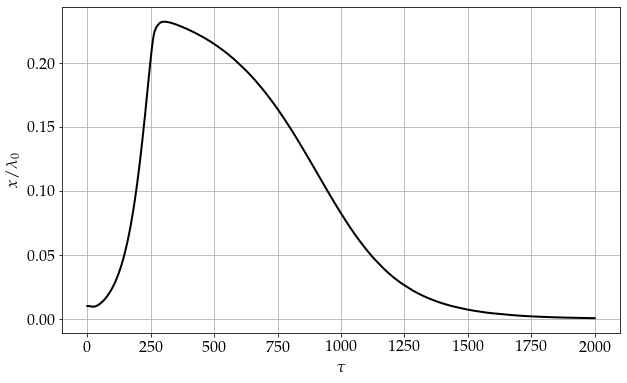

In [4]:
# Figure 1. (a)
FREQ = [25.0]                   # (kHz)
PA   = [0.21]                   # (bar)
R0 = get_radius(0.87, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

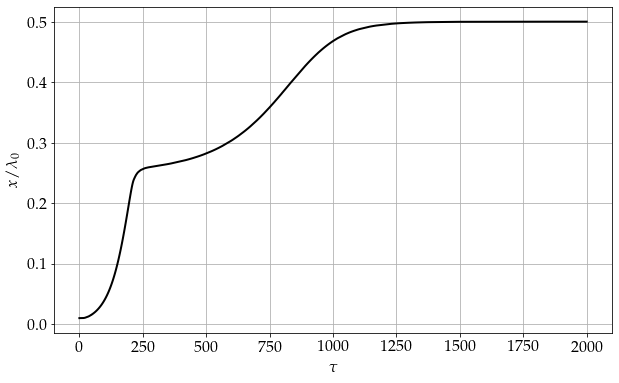

In [5]:
# Figure 1. (b)
FREQ = [25.0]                   # (kHz)
PA   = [0.25]                   # (bar)
R0 = get_radius(0.87, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

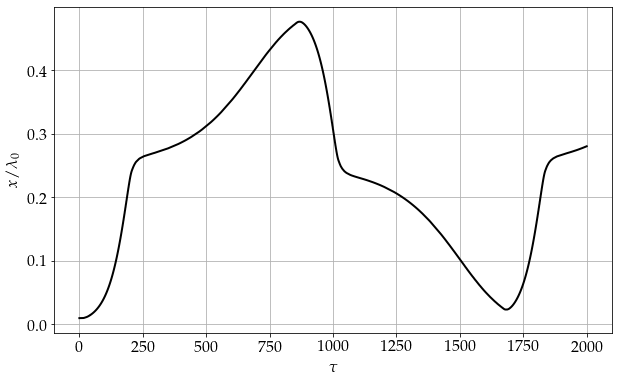

In [6]:
# Figure 1. (c)
FREQ = [25.0]                   # (kHz)
PA   = [0.26]                   # (bar)
R0 = get_radius(0.87, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

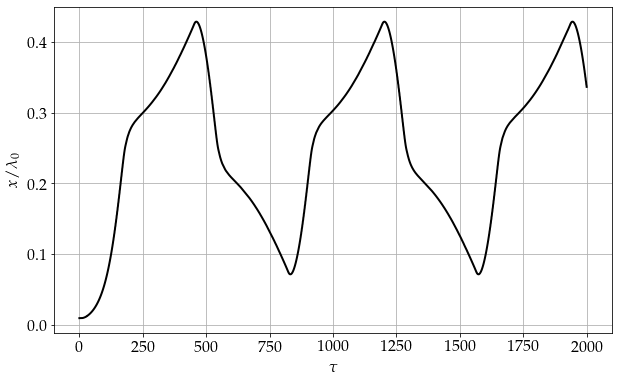

In [7]:
# Figure 1. (d)
FREQ = [25.0]                   # (kHz)
PA   = [0.30]                   # (bar)
R0 = get_radius(0.87, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

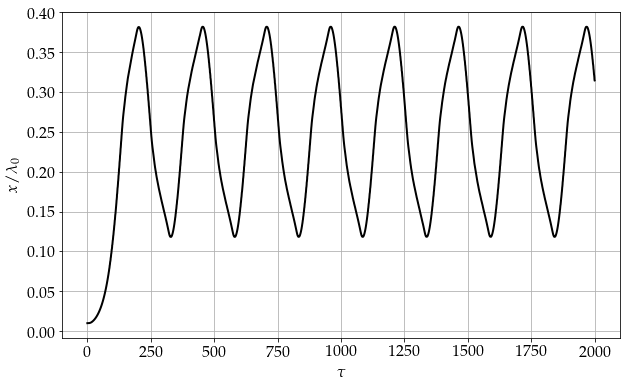

In [8]:
# Figure 1. (e)
FREQ = [25.0]                   # (kHz)
PA   = [0.40]                   # (bar)
R0 = get_radius(0.87, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

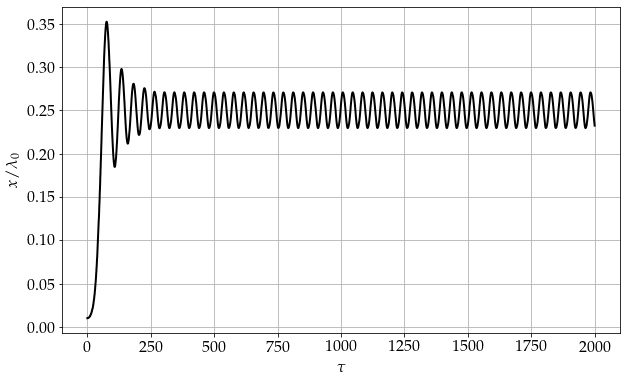

In [9]:
# Figure 3. (a)
FREQ = [25.0]                   # (kHz)
PA   = [1.70]                   # (bar)
R0 = get_radius(1.03, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()

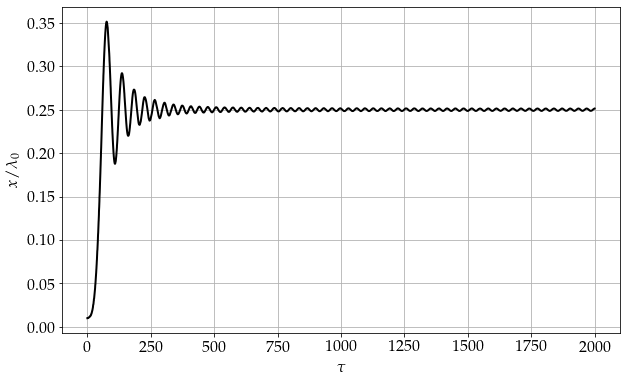

In [10]:
# Figure 3. (b)
FREQ = [25.0]                   # (kHz)
PA   = [1.70]                   # (bar)
R0 = get_radius(1.06, FREQ[0])  # (micron)

km = KMBubble(R0, FREQ, PA, AC_FIELD="SW_N")
km.x0 = 0.26
km.T = 2000
t, _, _, x, _ = km.integrate()

plt.figure(figsize=(10, 6))
plt.plot(t, x-0.25, 'k-', linewidth=2)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$x/\lambda_0$')
plt.grid('both')
plt.show()